# Breast Cancer classification

In [171]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [172]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [173]:
data.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [174]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [175]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data.data, columns = data.feature_names)

In [176]:
# setting notebooks to show all rows and columns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [177]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [178]:
data.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [179]:
y = pd.DataFrame(data.target.reshape(-1,1), columns = ['Cancer'])

In [180]:
df = pd.concat([df, y], axis = 1)

In [181]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [182]:
# # malignant instances
sum(df.Cancer==0)

212

In [183]:
# # benign instances
sum(df.Cancer == 1)

357

# Descriptive stats

In [184]:
# shape of dataframe
df.shape

(569, 31)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.dtype, (x.isnull().sum()/len(x))*100, len(x.dropna().unique()), len(x), x.count(), x.isnull().sum(), x.sum(), x.dropna().mean(), x.dropna().median(),  x.dropna().std(), x.dropna().var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max(), (x.dropna().quantile(0.75) - x.dropna().quantile(0.10)), (x.dropna().mean()+3*(x.dropna().std())), (x.dropna().mean()-3*(x.dropna().std())), (x.dropna().quantile(0.10)-(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.10)))), (x.dropna().quantile(0.75)+(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.10)))), ((x.max() > x.dropna().mean()+3*x.dropna().std()) | (x.min() < x.dropna().mean()-3*x.dropna().std())), ((x.max() > x.dropna().quantile(0.75)+(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.10)))) | (x.min() < x.dropna().quantile(0.10)-(1.5*(x.dropna().quantile(0.75) - x.dropna().quantile(0.10)))))] ,
                  index=['D-type', 'NMISS%', 'unique', 'Length', 'N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10(Q1)' ,'P25' ,'P50(Q2)', 'P75(Q3)' ,'P90' ,'P95' ,'P99' ,'MAX', 'IQR', '+3std', '-3std', 'lowerB', 'upperB', 'outlier 1', 'outlier 2'])

df.apply(lambda x: var_summary(x)).T

,D-type,NMISS%,unique,Length,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10(Q1),P25,P50(Q2),P75(Q3),P90,P95,P99,MAX,IQR,+3std,-3std,lowerB,upperB,outlier 1,outlier 2
mean radius,float64,0,456,569,569,0,8038.43,14.1273,13.37,3.52405,12.4189,6.981,8.45836,9.5292,10.26,11.7,13.37,15.78,19.53,20.576,24.3716,28.11,5.52,24.6994,3.55515,1.98,24.06,True,True
mean texture,float64,0,479,569,569,0,10975.8,19.2896,18.84,4.30104,18.4989,9.71,10.9304,13.088,14.078,16.17,18.84,21.8,24.992,27.15,30.652,39.28,7.722,32.1928,6.38654,2.495,33.383,True,True
mean perimeter,float64,0,522,569,569,0,52330.4,91.969,86.24,24.299,590.44,43.79,53.8276,60.496,65.83,75.17,86.24,104.1,129.1,135.82,165.724,188.5,38.27,164.866,19.0721,8.425,161.505,True,True
mean area,float64,0,539,569,569,0,372632,654.889,551.1,351.914,123844,143.5,215.664,275.78,321.6,420.3,551.1,782.7,1177.4,1309.8,1786.6,2501,461.1,1710.63,-400.853,-370.05,1474.35,True,True
mean smoothness,float64,0,474,569,569,0,54.829,0.0963603,0.09587,0.0140641,0.0001978,0.05263,0.068654,0.075042,0.079654,0.08637,0.09587,0.1053,0.11482,0.11878,0.132888,0.1634,0.025646,0.138553,0.0541679,0.041185,0.143769,True,True
mean compactness,float64,0,537,569,569,0,59.37,0.104341,0.09263,0.0528128,0.00278919,0.01938,0.0333508,0.04066,0.0497,0.06492,0.09263,0.1304,0.17546,0.2087,0.277192,0.3454,0.0807,0.262779,-0.0540973,-0.07135,0.25145,True,True
mean concavity,float64,0,537,569,569,0,50.5268,0.0887993,0.06154,0.0797198,0.00635525,0,0,0.0049826,0.013686,0.02956,0.06154,0.1307,0.20304,0.24302,0.351688,0.4268,0.117014,0.327959,-0.15036,-0.161835,0.306221,True,True
mean concave points,float64,0,542,569,569,0,27.835,0.0489191,0.0335,0.0388028,0.00150566,0,0,0.0056208,0.011158,0.02031,0.0335,0.074,0.10042,0.12574,0.164208,0.2012,0.062842,0.165328,-0.0674894,-0.083105,0.168263,True,True
mean symmetry,float64,0,432,569,569,0,103.081,0.181162,0.1792,0.0274143,0.000751543,0.106,0.129508,0.1415,0.14958,0.1619,0.1792,0.1957,0.21494,0.23072,0.259564,0.304,0.04612,0.263405,0.098919,0.0804,0.26488,True,True
mean fractal dimension,float64,0,499,569,569,0,35.7318,0.0627976,0.06154,0.00706036,4.98487e-05,0.04996,0.051504,0.053926,0.055338,0.0577,0.06154,0.06612,0.072266,0.07609,0.0854376,0.09744,0.010782,0.0839787,0.0416165,0.039165,0.082293,True,True


In [17]:
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(df)

C:\Users\ichigo\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,31
Number of observations,569
Total Missing (%),0.0%
Total size in memory,135.6 KiB
Average record size in memory,244.1 B
Numeric,20
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,10


### Distribution of data

In [20]:
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
sns.set_style("white")
def histo(col):
    plt.figure()
    sns.distplot(col, color = 'red', hist_kws=dict(edgecolor="k", linewidth=1))
    plt.show()

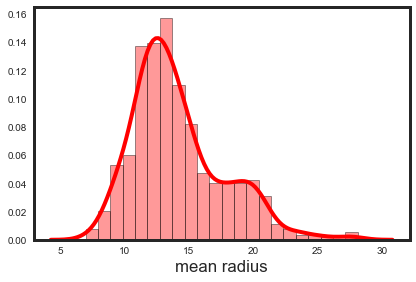

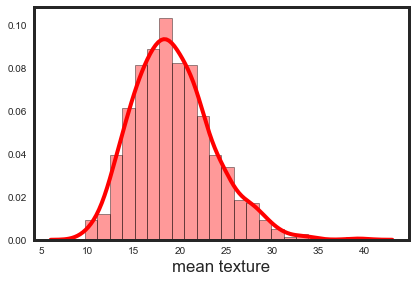

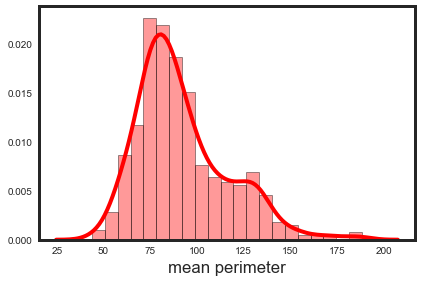

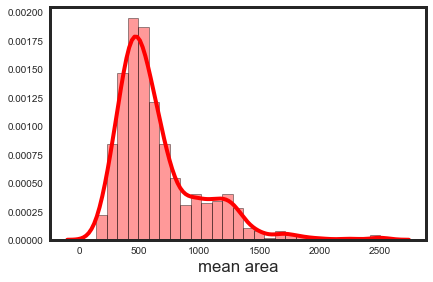

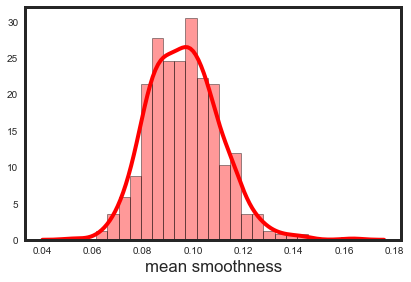

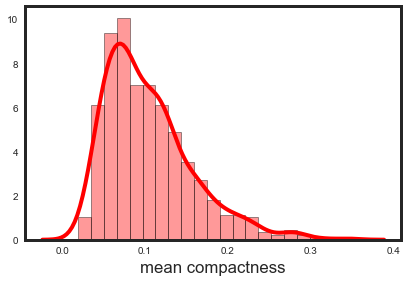

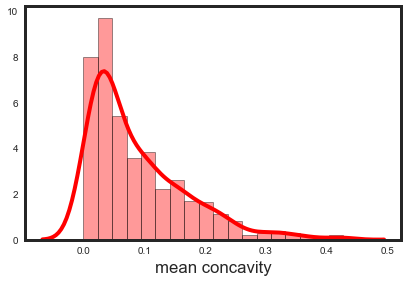

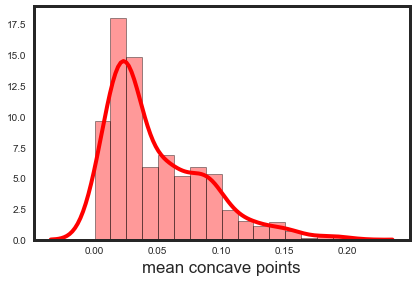

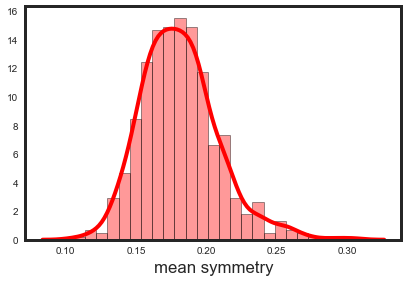

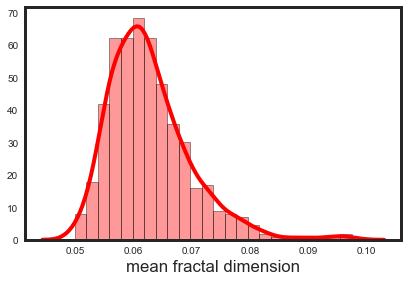

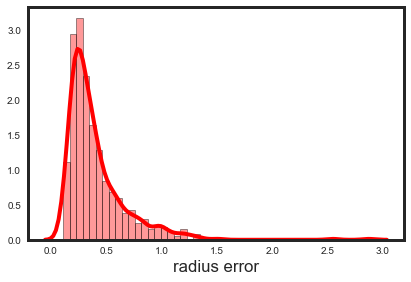

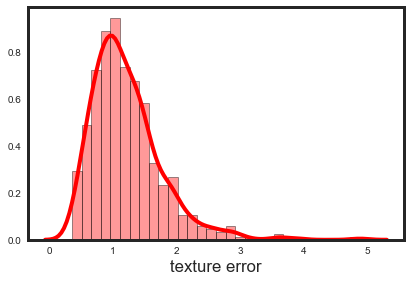

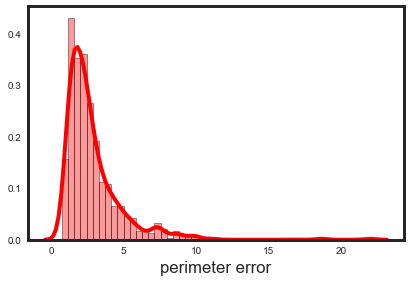

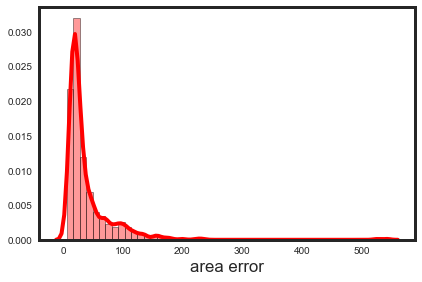

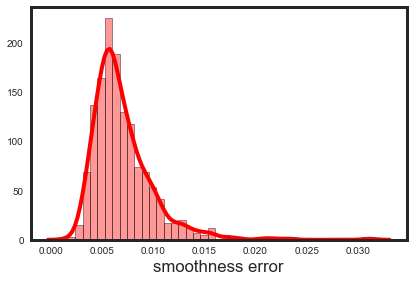

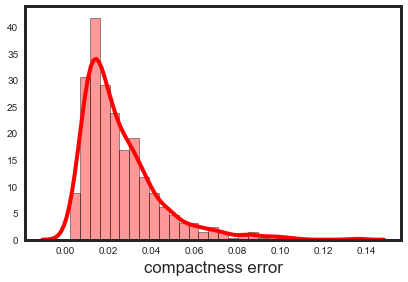

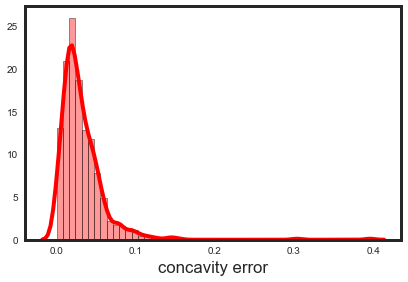

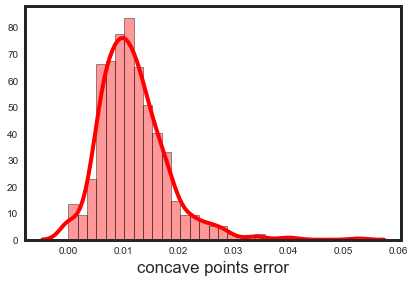

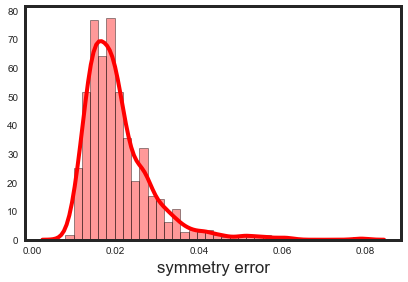

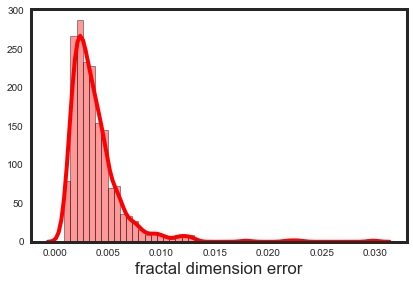

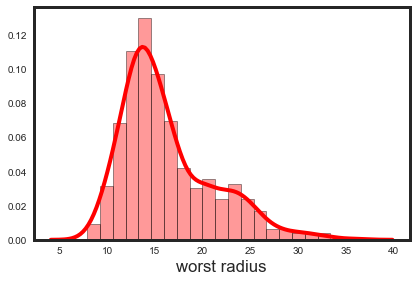

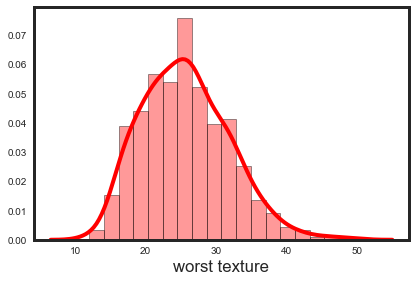

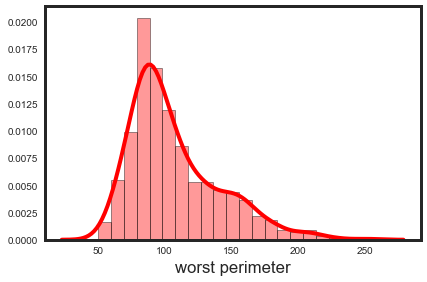

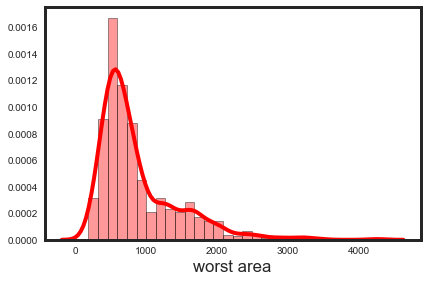

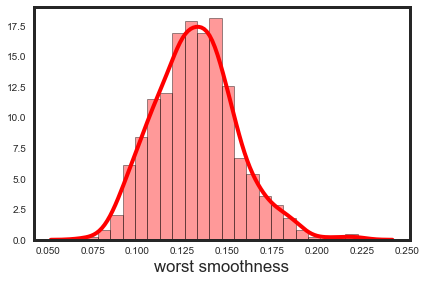

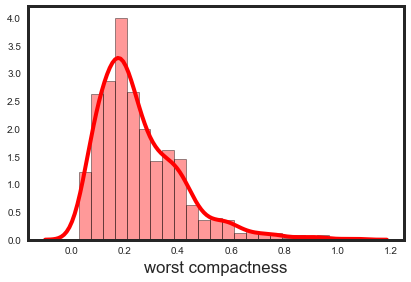

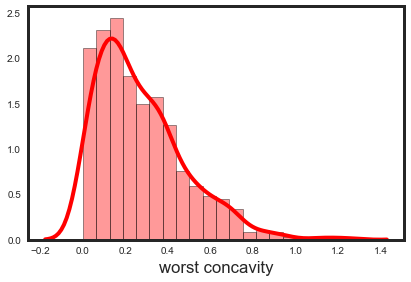

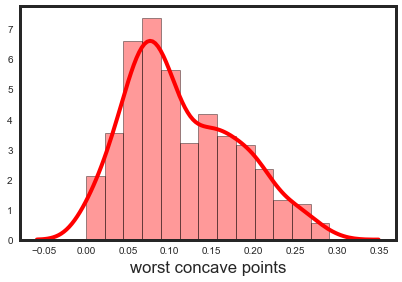

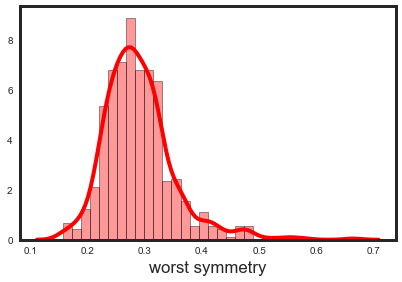

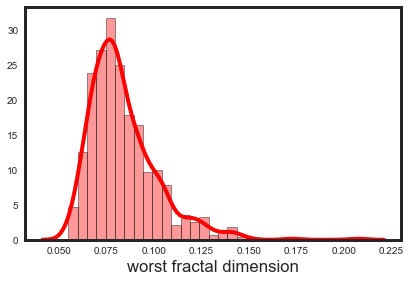

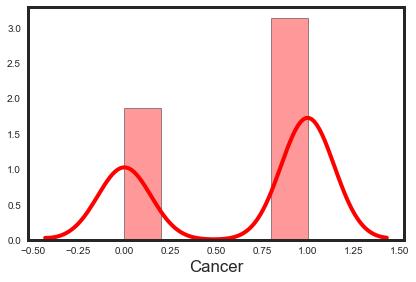

mean radius                None
mean texture               None
mean perimeter             None
mean area                  None
mean smoothness            None
mean compactness           None
mean concavity             None
mean concave points        None
mean symmetry              None
mean fractal dimension     None
radius error               None
texture error              None
perimeter error            None
area error                 None
smoothness error           None
compactness error          None
concavity error            None
concave points error       None
symmetry error             None
fractal dimension error    None
worst radius               None
worst texture              None
worst perimeter            None
worst area                 None
worst smoothness           None
worst compactness          None
worst concavity            None
worst concave points       None
worst symmetry             None
worst fractal dimension    None
Cancer                     None
dtype: o

In [21]:
df.apply(histo, axis = 0 )

In [22]:
# Visualising data using boxplots
def uni_variate(col):
    plt.figure()
    sns.boxplot(x = col, color = 'gold')
    plt.show()

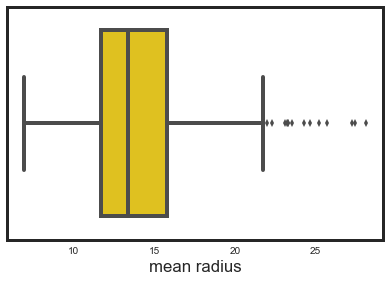

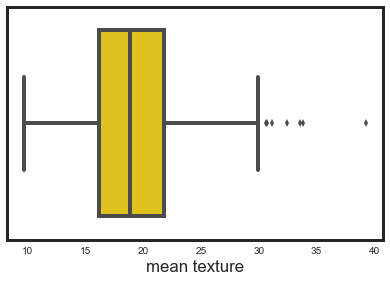

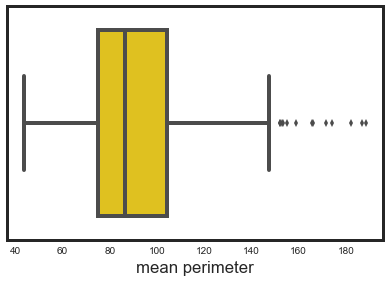

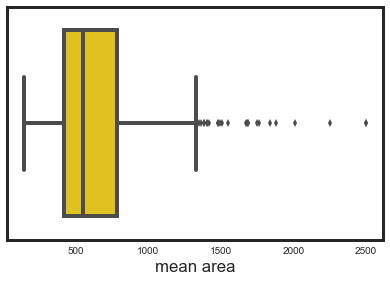

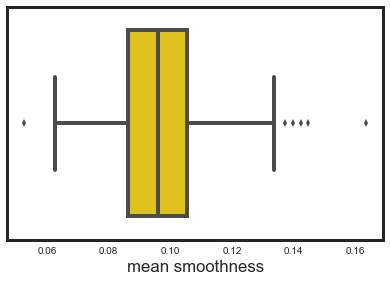

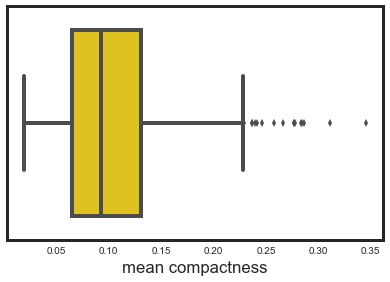

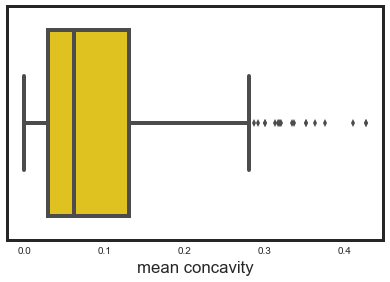

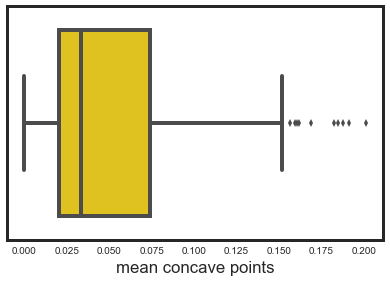

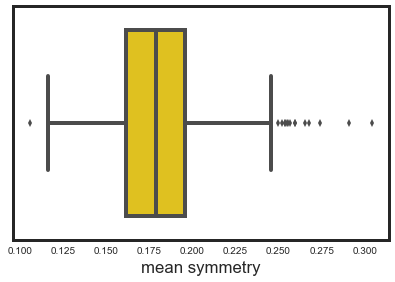

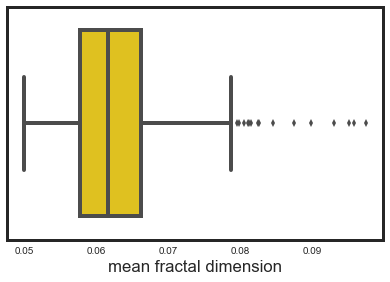

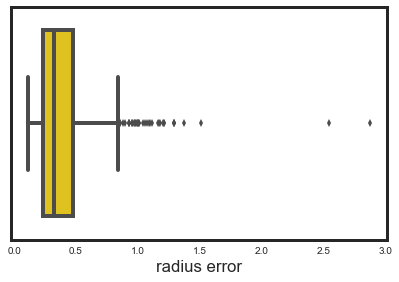

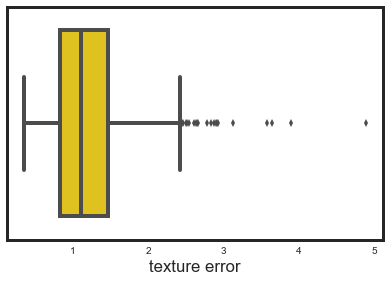

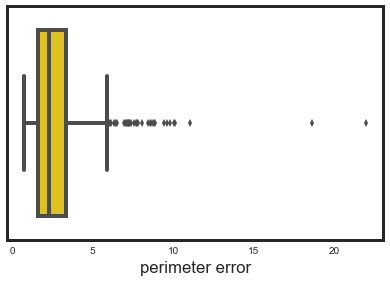

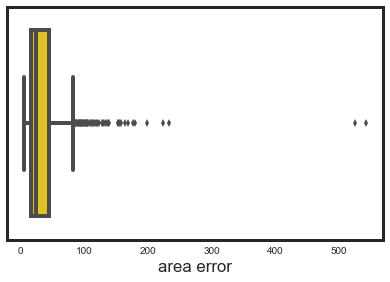

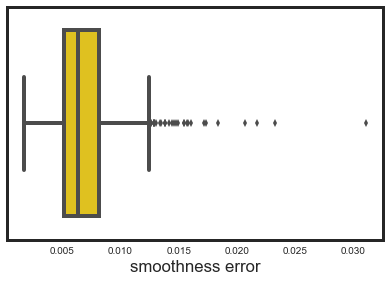

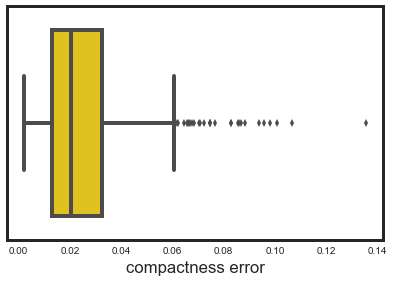

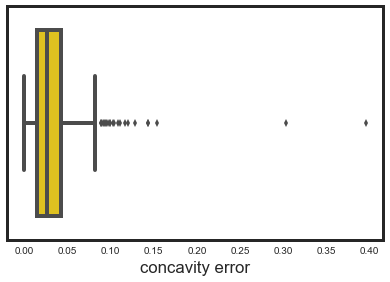

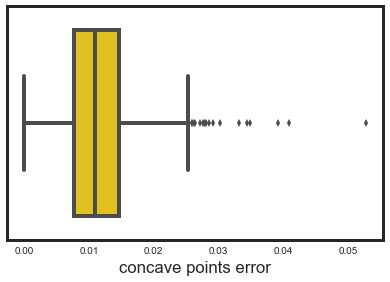

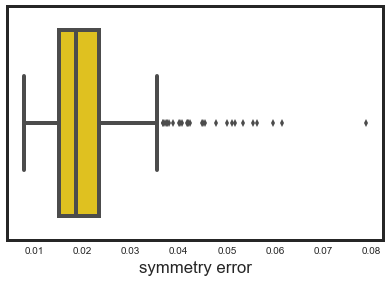

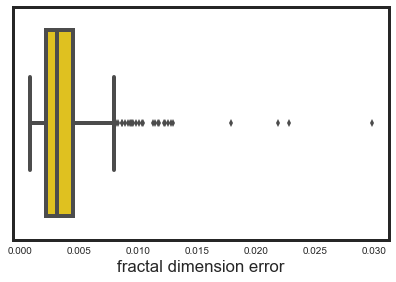

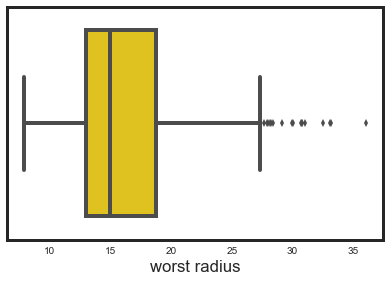

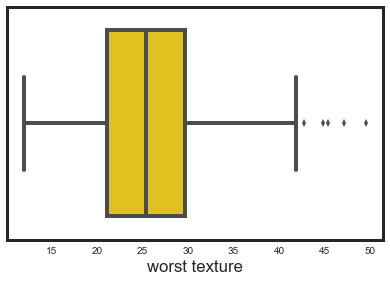

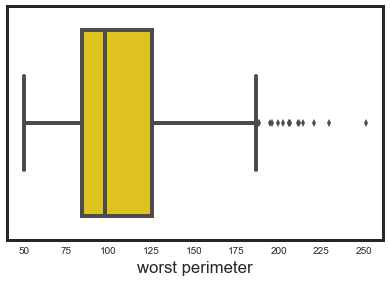

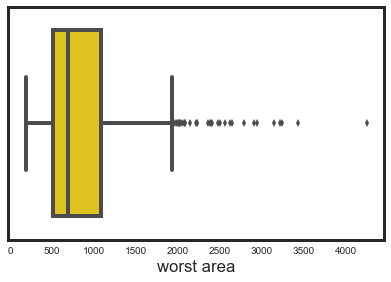

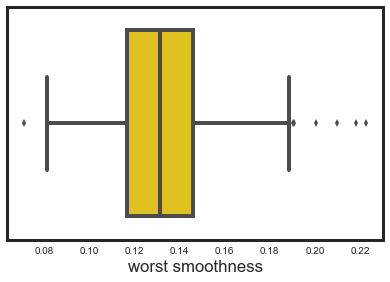

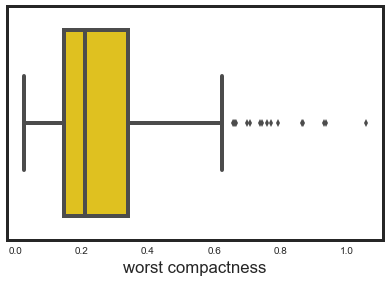

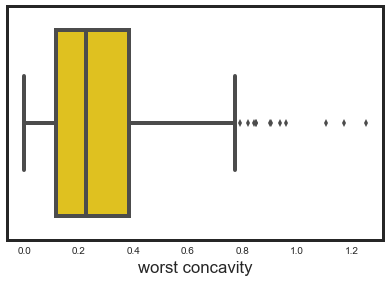

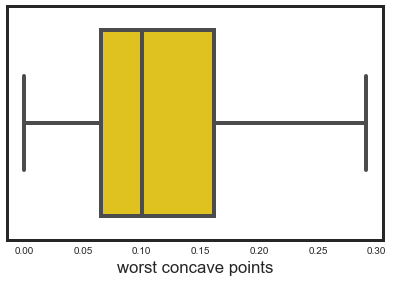

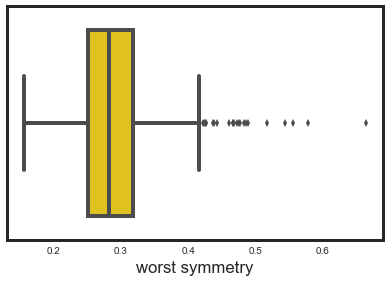

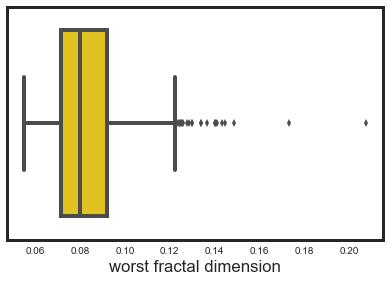

mean radius                None
mean texture               None
mean perimeter             None
mean area                  None
mean smoothness            None
mean compactness           None
mean concavity             None
mean concave points        None
mean symmetry              None
mean fractal dimension     None
radius error               None
texture error              None
perimeter error            None
area error                 None
smoothness error           None
compactness error          None
concavity error            None
concave points error       None
symmetry error             None
fractal dimension error    None
worst radius               None
worst texture              None
worst perimeter            None
worst area                 None
worst smoothness           None
worst compactness          None
worst concavity            None
worst concave points       None
worst symmetry             None
worst fractal dimension    None
dtype: object

In [23]:
df.iloc[:, :-1].apply(uni_variate, axis = 0 )

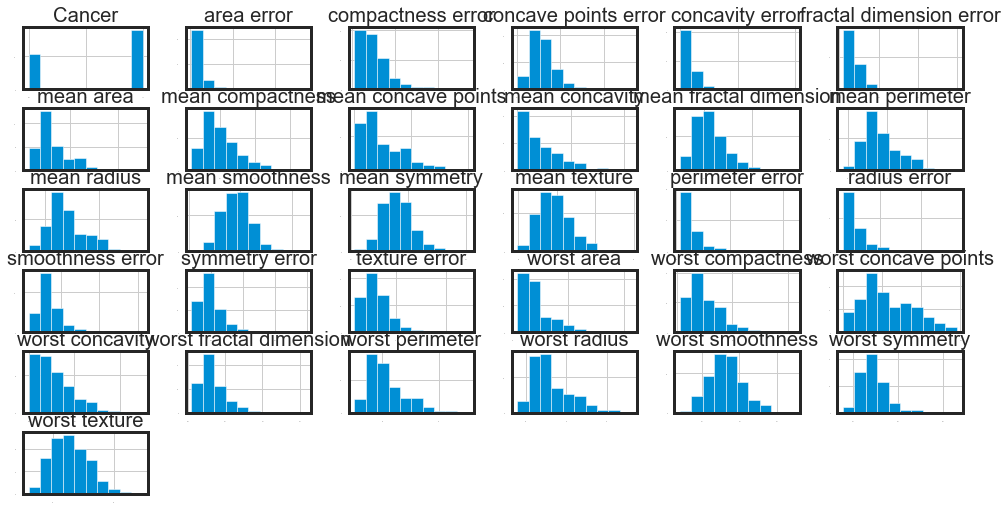

In [24]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize = (15, 8))
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponentiallike
distributions for other attributes.

### T-Test
The t test (also called Student's T Test) compares two averages (means) and tells you if they are different from each other

In [187]:
# Checking Multicollineirty
# Utility function to find high correlation variables
def find_corr(data, threshold=0.9, remove_negative=False):
    corr_matrix = data.corr()
    
    if remove_negative:
        corr_matrix = np.abs(corr_matrix)
        
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [188]:
drop_li = find_corr(df.drop('Cancer', axis = 1),threshold = 0.9, remove_negative =True)

In [189]:
df = df.drop(drop_li, axis = 1)

In [190]:
# Bi-variate Analysis
from scipy.stats import ttest_ind
tstats_df = pd.DataFrame()
for i in df.columns:
    tstats = ttest_ind(df[df['Cancer']==1][i],df[df['Cancer']==0][i])
    temp = pd.DataFrame([i, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

tstats_df.sort_values(by = 'P-Value', ascending= False)

,Variable Name,T-Statistic,P-Value
13,symmetry error,0.155298,0.876642
8,texture error,0.197724,0.843332
6,mean fractal dimension,0.305711,0.759937
9,smoothness error,1.59936,0.110297
14,fractal dimension error,-1.86233,0.0630736
11,concavity error,-6.24616,8.26018e-10
10,compactness error,-7.29708,9.97599e-13
19,worst fractal dimension,-8.15132,2.31643e-15
5,mean symmetry,-8.33831,5.73338e-16
2,mean smoothness,-9.1461,1.05185e-18


In [191]:
df = df.drop(['symmetry error', 'texture error', 'mean fractal dimension', 'smoothness error', 'fractal dimension error'], axis = 1)

In [192]:
# Bi-variate Analysis
from scipy.stats import ttest_ind
tstats_df = pd.DataFrame()
for i in df.columns:
    tstats = ttest_ind(df[df['Cancer']==1][i],df[df['Cancer']==0][i])
    temp = pd.DataFrame([i, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

tstats_df.sort_values(by = 'P-Value', ascending= False)

,Variable Name,T-Statistic,P-Value
8,concavity error,-6.24616,8.26018e-10
7,compactness error,-7.29708,9.97599e-13
14,worst fractal dimension,-8.15132,2.31643e-15
5,mean symmetry,-8.33831,5.73338e-16
2,mean smoothness,-9.1461,1.05185e-18
9,concave points error,-10.6425,3.07231e-24
1,mean texture,-10.8672,4.05864e-25
13,worst symmetry,-10.9023,2.95112e-25
10,worst smoothness,-11.0667,6.57514e-26
6,radius error,-16.3964,9.73895e-50


#### Data Exploratory Analysis
    - Visualization of variable importance

C:\Users\ichigo\AppData\Local\conda\conda\envs\my_root\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ichigo\AppData\Local\conda\conda\envs\my_root\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


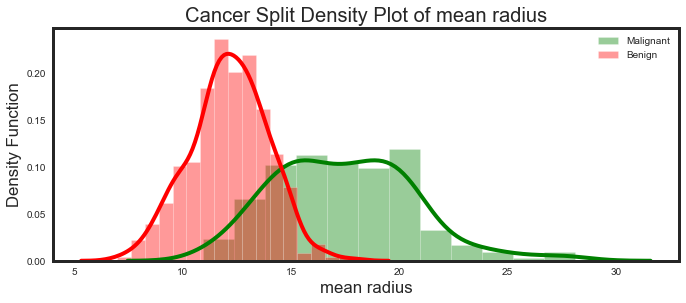

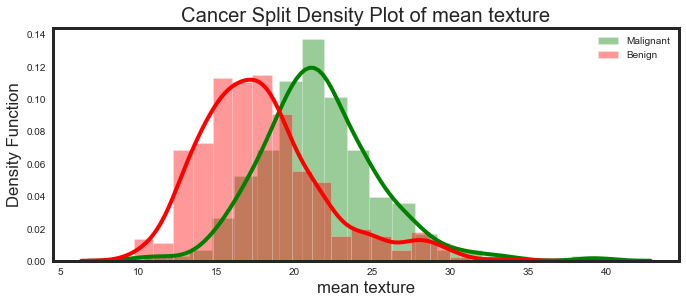

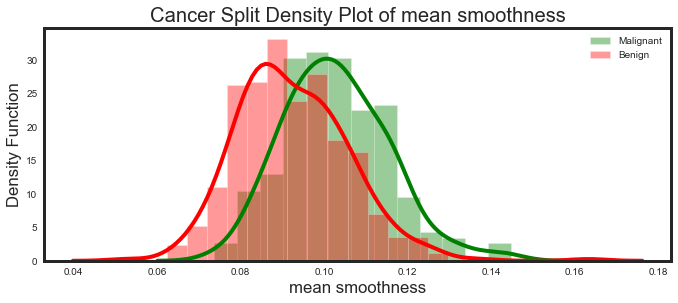

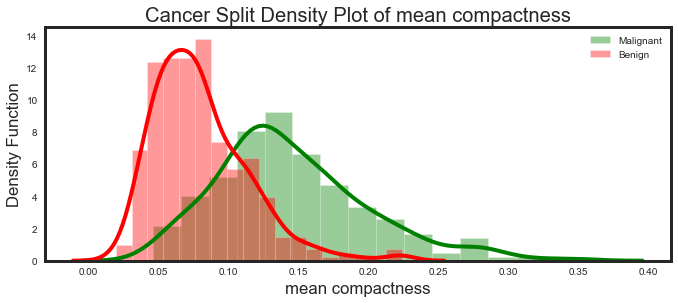

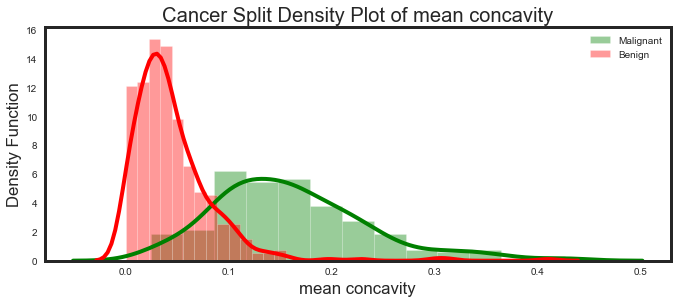

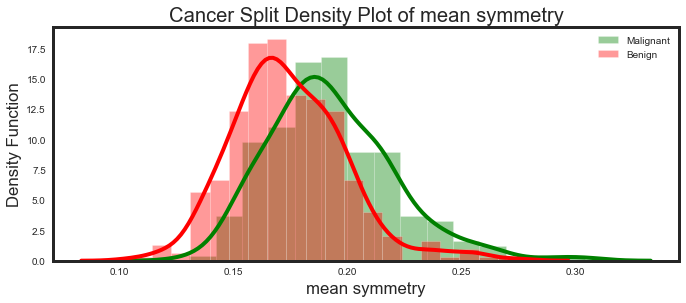

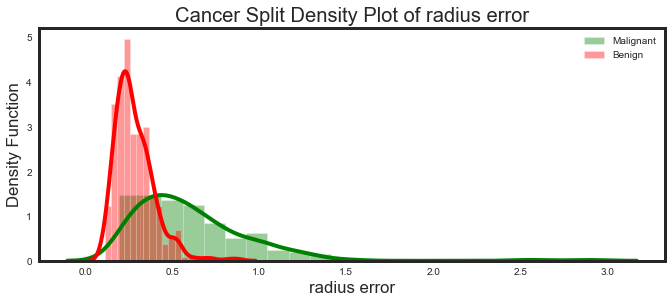

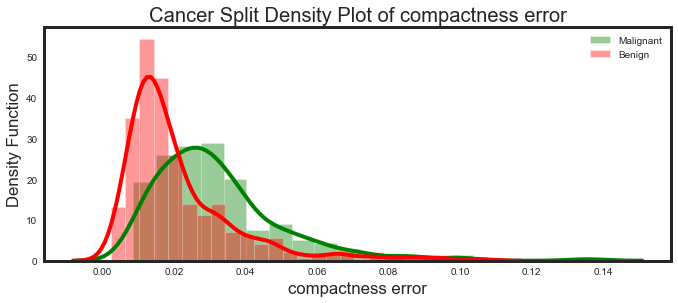

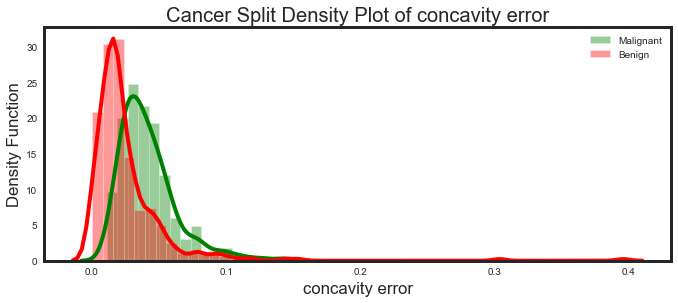

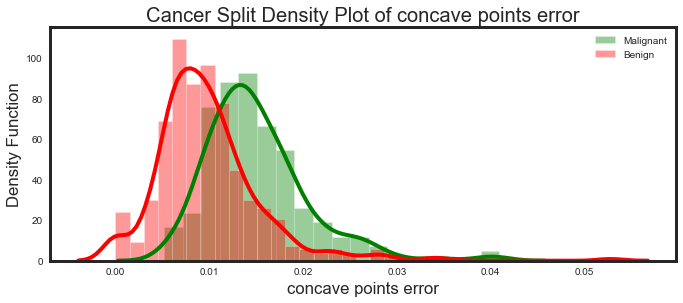

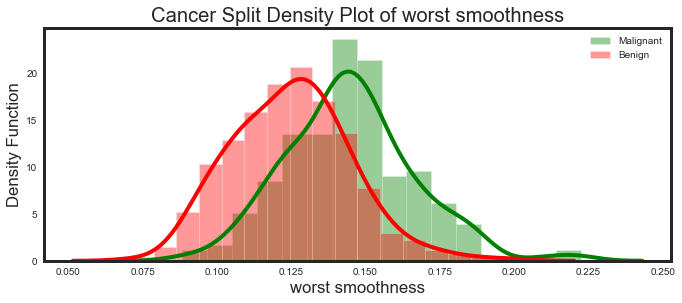

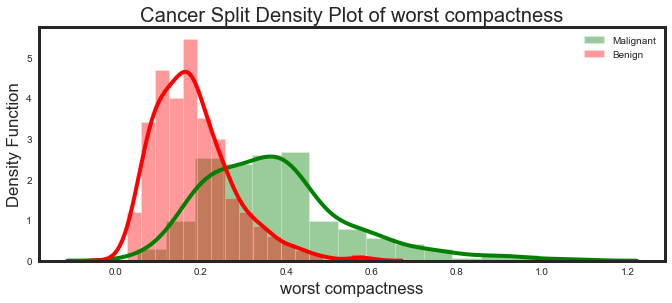

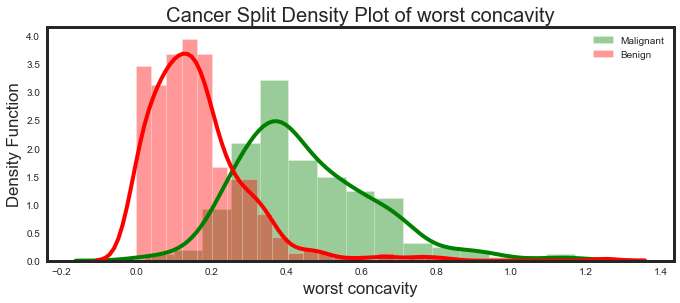

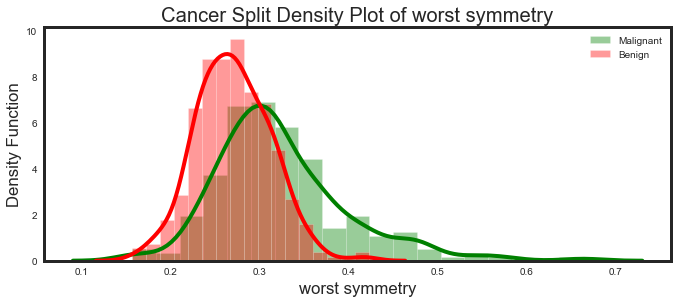

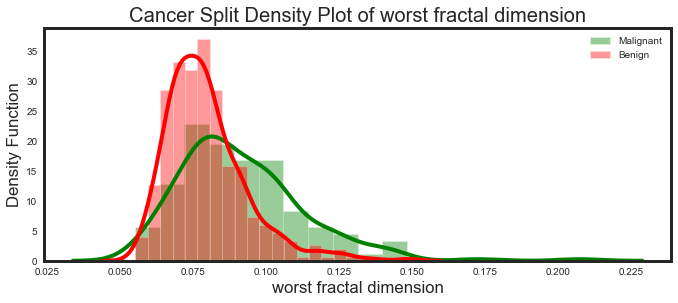

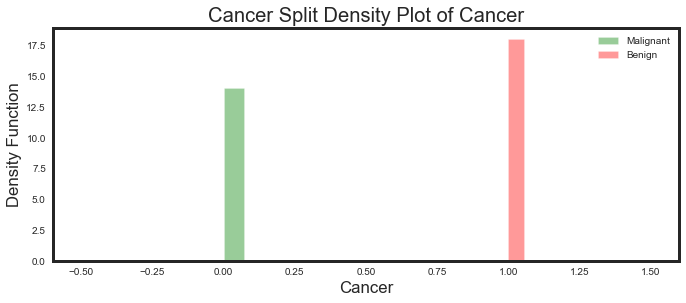

In [35]:
for i in df.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[i], kde=False, color='g', hist=True)
    sns.distplot(df[df['Cancer']==0][i], label='Malignant', color='green', hist=True, norm_hist=False)
    sns.distplot(df[df['Cancer']==1][i], label='Benign', color='red', hist=True, norm_hist=False)
    plt.xlabel(str(i) )
    plt.ylabel('Density Function')
    plt.title(str('Cancer Split Density Plot of ')+str(i))
    plt.legend()

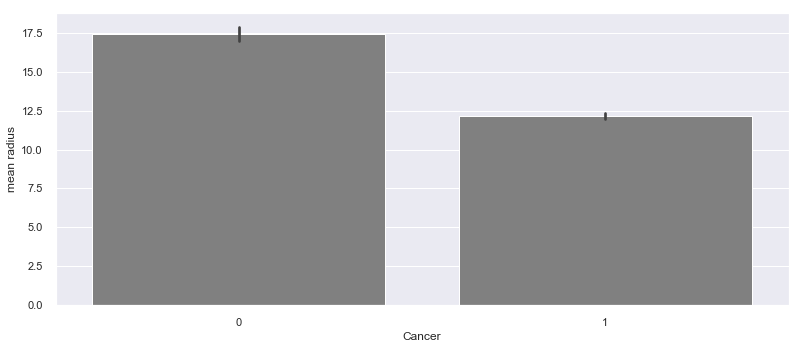

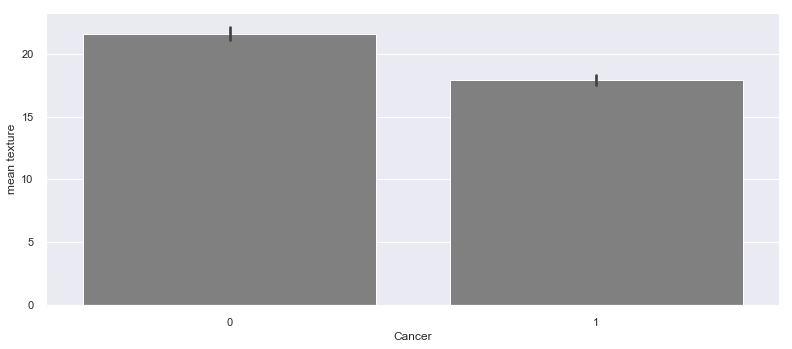

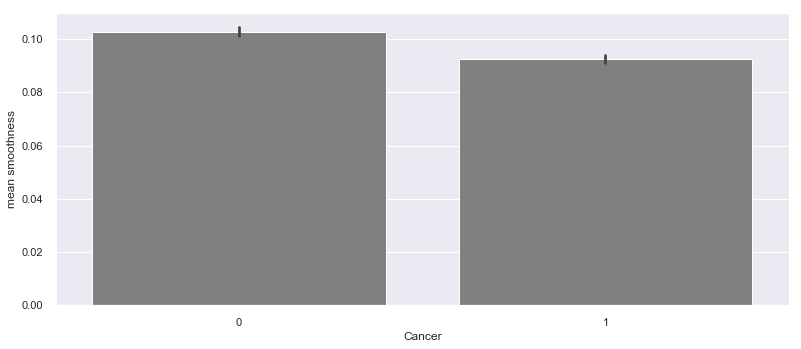

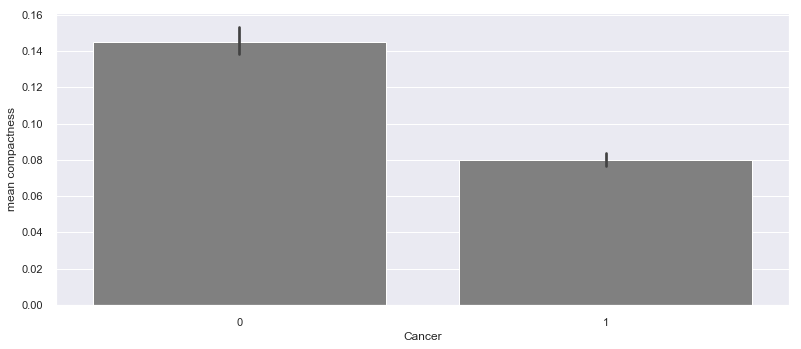

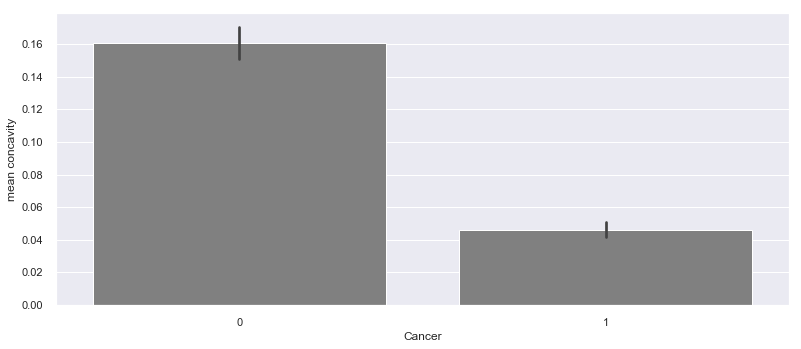

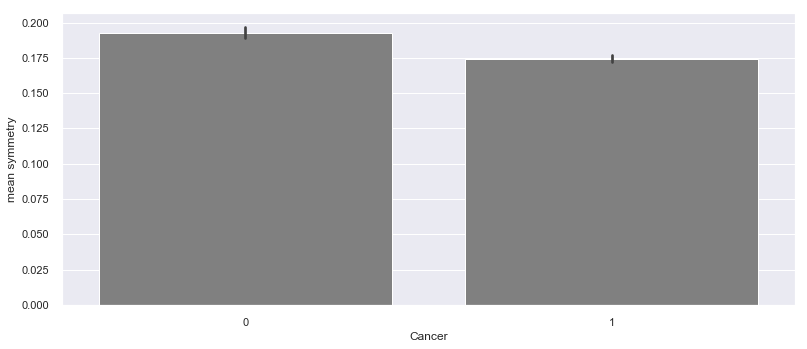

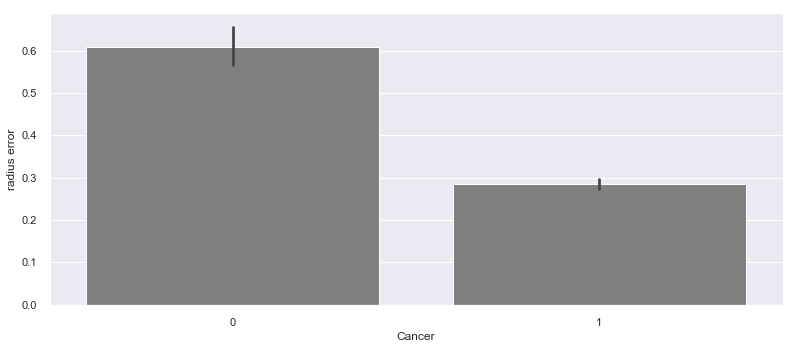

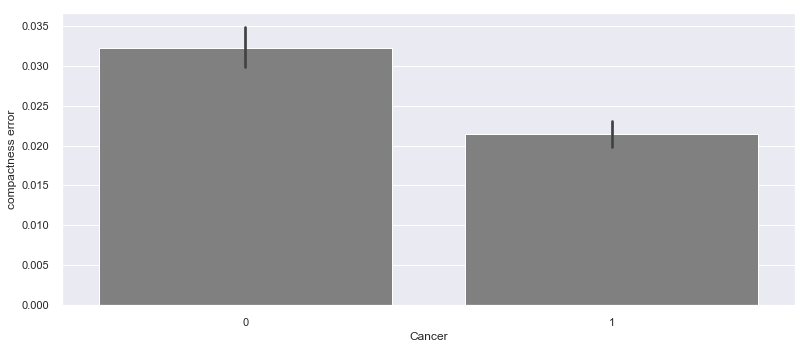

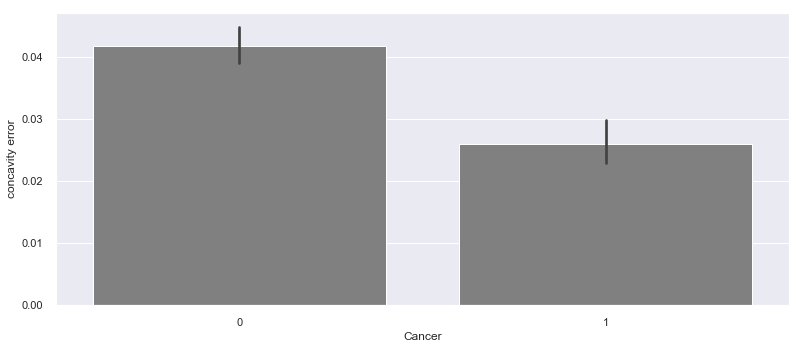

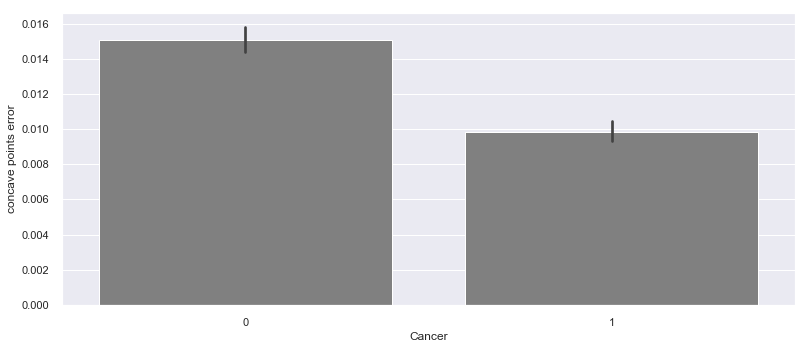

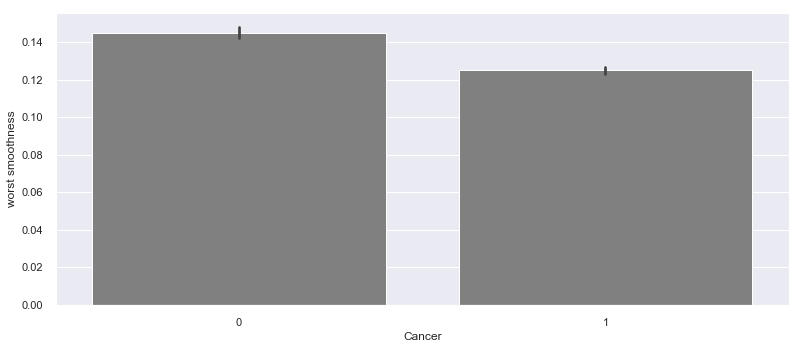

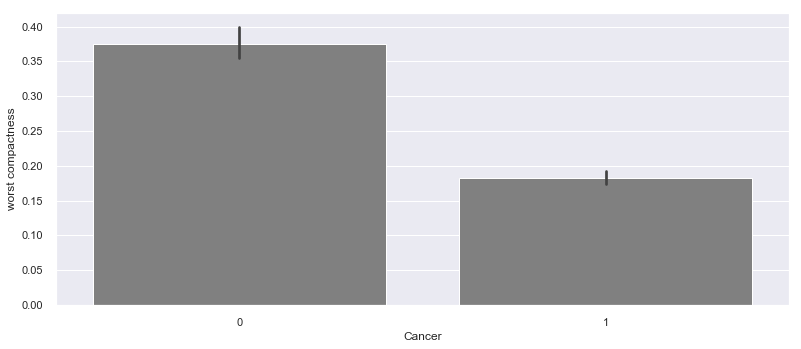

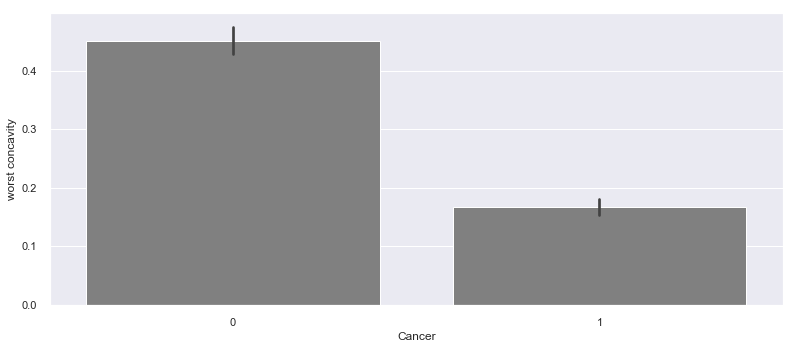

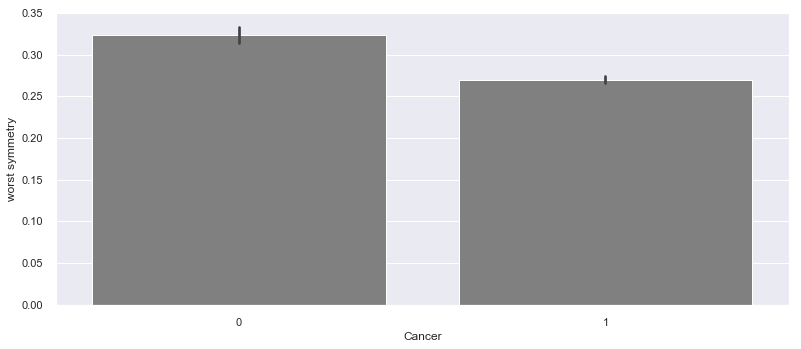

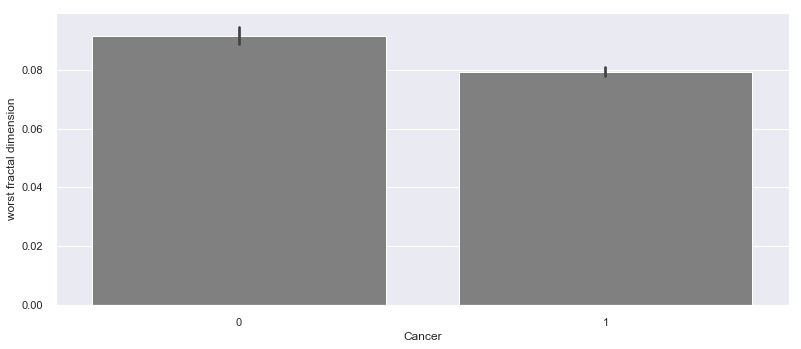

In [36]:
# Bivariate Analysis
for i in df.columns[:-1]:
    sns.set(rc={'figure.figsize':(11.7,5)})
    plt.figure()
    sns.barplot('Cancer', i, data = df, color = 'grey')
    plt.show()

    #p.ax_marg_x.set_axis_off()
    #p.ax_marg_y.set_axis_off()

In [193]:
df.shape

(569, 16)

In [194]:
df.drop('Cancer', axis = 1).corr().round(2)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,radius error,compactness error,concavity error,concave points error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
mean radius,1.00,0.32,0.17,0.51,0.68,0.15,0.68,0.21,0.19,0.38,0.12,0.41,0.53,0.16,0.01
mean texture,0.32,1.00,-0.02,0.24,0.30,0.07,0.28,0.19,0.14,0.16,0.08,0.28,0.30,0.11,0.12
mean smoothness,0.17,-0.02,1.00,0.66,0.52,0.56,0.30,0.32,0.25,0.38,0.81,0.47,0.43,0.39,0.50
mean compactness,0.51,0.24,0.66,1.00,0.88,0.60,0.50,0.74,0.57,0.64,0.57,0.87,0.82,0.51,0.69
mean concavity,0.68,0.30,0.52,0.88,1.00,0.50,0.63,0.67,0.69,0.68,0.45,0.75,0.88,0.41,0.51
mean symmetry,0.15,0.07,0.56,0.60,0.50,1.00,0.30,0.42,0.34,0.39,0.43,0.47,0.43,0.70,0.44
radius error,0.68,0.28,0.30,0.50,0.63,0.30,1.00,0.36,0.33,0.51,0.14,0.29,0.38,0.09,0.05
compactness error,0.21,0.19,0.32,0.74,0.67,0.42,0.36,1.00,0.80,0.74,0.23,0.68,0.64,0.28,0.59
concavity error,0.19,0.14,0.25,0.57,0.69,0.34,0.33,0.80,1.00,0.77,0.17,0.48,0.66,0.20,0.44
concave points error,0.38,0.16,0.38,0.64,0.68,0.39,0.51,0.74,0.77,1.00,0.22,0.45,0.55,0.14,0.31


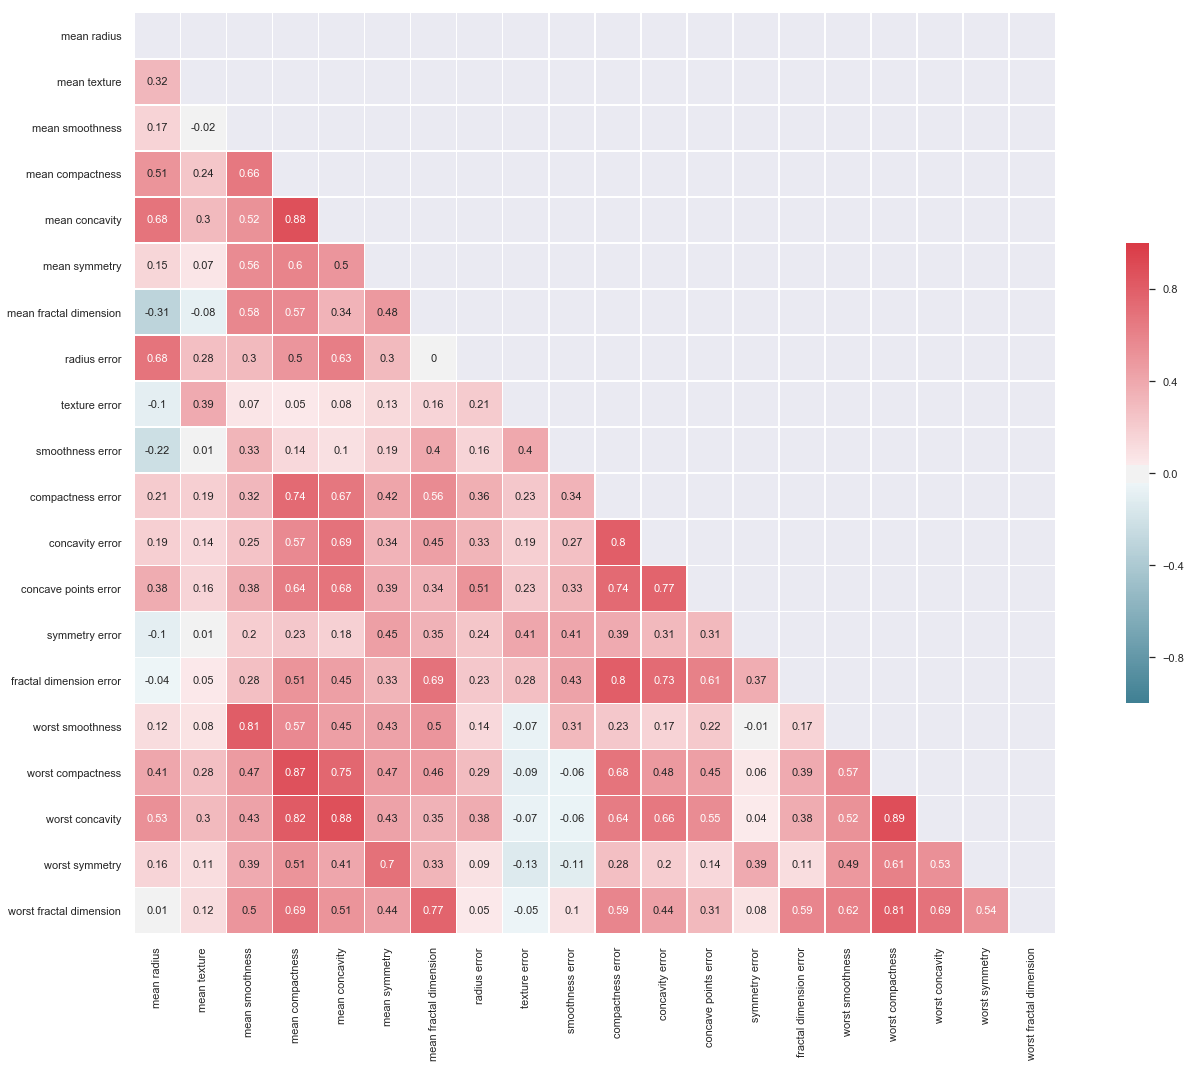

In [106]:
# Generate and visualize the correlation matrix
corr = df.drop('Cancer', axis = 1).corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 15))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.rc('axes', labelsize=50) 

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'fontsize' : 11})

plt.tight_layout()

In [195]:
col = df.columns

In [196]:
col = [x.replace(" ", "") for x in col]

In [197]:
df.columns = col

In [198]:
# Validating Assumptions 
# Multicollinearity
# W/o bucketing
## Variance Inflation Factor assessment
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns


In [199]:
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,365.091013,Intercept
5,25.406132,meanconcavity
11,24.828636,worstcompactness
12,24.087609,worstconcavity
4,20.474074,meancompactness
3,9.341157,concavityerror
1,8.310433,compactnesserror
7,5.773637,meansmoothness
6,5.468391,meanradius
13,5.460999,worstfractaldimension


In [200]:
df = df.drop('meanconcavity', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,329.570117,Intercept
10,21.337777,worstcompactness
11,15.765365,worstconcavity
4,13.152556,meancompactness
3,8.681034,concavityerror
1,8.310250,compactnesserror
6,5.770499,meansmoothness
12,5.450870,worstfractaldimension
13,4.836764,worstsmoothness
5,4.696208,meanradius


In [201]:
df = df.drop('worstcompactness', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,328.386480,Intercept
4,11.248101,meancompactness
10,8.948006,worstconcavity
1,6.376902,compactnesserror
3,6.025390,concavityerror
6,5.597799,meansmoothness
12,4.816699,worstsmoothness
5,4.696167,meanradius
11,4.695750,worstfractaldimension
2,4.061815,concavepointserror


In [202]:
df = df.drop('meancompactness', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,228.338042,Intercept
9,7.956484,worstconcavity
3,5.494343,concavityerror
11,4.717321,worstsmoothness
1,4.614232,compactnesserror
5,4.421363,meansmoothness
10,4.334271,worstfractaldimension
4,4.134299,meanradius
2,4.016123,concavepointserror
6,3.176612,meansymmetry


In [203]:
df = df.drop('worstconcavity', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,113.186446,Intercept
1,4.608251,compactnesserror
10,4.459608,worstsmoothness
5,4.389923,meansmoothness
2,3.966259,concavepointserror
3,3.618003,concavityerror
9,3.244849,worstfractaldimension
6,3.164591,meansymmetry
11,2.984508,worstsymmetry
8,2.482721,radiuserror


In [204]:
df = df.drop('compactnesserror', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,108.898812,Intercept
4,4.386454,meansmoothness
9,4.250188,worstsmoothness
1,3.481126,concavepointserror
5,3.150809,meansymmetry
2,3.043620,concavityerror
10,2.982649,worstsymmetry
7,2.461746,radiuserror
8,2.386724,worstfractaldimension
3,2.199088,meanradius


In [205]:
df = df.drop('meansmoothness', axis = 1)

features = "+".join(df.columns.difference(['Cancer']))


a,b = dmatrices(formula_like='Cancer ~ '+ features, data = df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,98.757426,Intercept
1,3.375459,concavepointserror
2,3.009298,concavityerror
9,2.789444,worstsymmetry
4,2.663614,meansymmetry
6,2.417977,radiuserror
7,2.386145,worstfractaldimension
3,2.199077,meanradius
8,1.869358,worstsmoothness
5,1.149248,meantexture


In [206]:
train_features = df.columns.difference(['Cancer'])
train_X, test_X = tts(df, test_size=0.2, random_state=42)
train_X.columns

Index(['meanradius', 'meantexture', 'meansymmetry', 'radiuserror',
       'concavityerror', 'concavepointserror', 'worstsmoothness',
       'worstsymmetry', 'worstfractaldimension', 'Cancer'],
      dtype='object')

In [207]:
# Run the model and report the results
model = smf.glm(formula='Cancer ~ ' + "+".join(train_features), data=train_X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

## All of the model variables are significant

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Cancer   No. Observations:                  455
Model:                            GLM   Df Residuals:                      445
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -40.245
Date:                Wed, 03 Oct 2018   Deviance:                       80.490
Time:                        06:05:40   Pearson chi2:                 2.29e+03
No. Iterations:                     9                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                55.7887      8.857      6.299      0.000      38.430      73.148
concavepointserror 

In [213]:
# Removing high p-values
train_X = train_X.drop('worstfractaldimension', axis = 1)
test_X = test_X.drop('worstfractaldimension', axis = 1)

train_features = train_X.columns.difference(['Cancer'])

model = smf.glm(formula='Cancer ~ ' + "+".join(train_features), data=train_X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Cancer   No. Observations:                  455
Model:                            GLM   Df Residuals:                      446
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -40.251
Date:                Wed, 03 Oct 2018   Deviance:                       80.502
Time:                        06:09:48   Pearson chi2:                 2.35e+03
No. Iterations:                     9                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             55.8843      8.816      6.339      0.000      38.605      73.164
concavepointserror   112.220

In [214]:
# Removing high p-values
train_X = train_X.drop('concavepointserror', axis = 1)
test_X = test_X.drop('concavepointserror', axis = 1)

train_features = train_X.columns.difference(['Cancer'])

model = smf.glm(formula='Cancer ~ ' + "+".join(train_features), data=train_X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Cancer   No. Observations:                  455
Model:                            GLM   Df Residuals:                      447
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -40.744
Date:                Wed, 03 Oct 2018   Deviance:                       81.487
Time:                        06:10:29   Pearson chi2:                 1.63e+03
No. Iterations:                     9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          53.2714      8.005      6.655      0.000      37.582      68.961
concavityerror     -5.6021     13.921

In [215]:
# Removing high p-values
train_X = train_X.drop('concavityerror', axis = 1)
test_X = test_X.drop('concavityerror', axis = 1)

train_features = train_X.columns.difference(['Cancer'])

model = smf.glm(formula='Cancer ~ ' + "+".join(train_features), data=train_X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Cancer   No. Observations:                  455
Model:                            GLM   Df Residuals:                      448
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -40.811
Date:                Wed, 03 Oct 2018   Deviance:                       81.623
Time:                        06:11:07   Pearson chi2:                 1.42e+03
No. Iterations:                     9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          53.6215      8.044      6.666      0.000      37.856      69.387
meanradius         -1.6207      0.275

In [216]:
# Removing high p-values
train_X = train_X.drop('meansymmetry', axis = 1)
test_X = test_X.drop('meansymmetry', axis = 1)

train_features = train_X.columns.difference(['Cancer'])

model = smf.glm(formula='Cancer ~ ' + "+".join(train_features), data=train_X, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Cancer   No. Observations:                  455
Model:                            GLM   Df Residuals:                      449
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -42.503
Date:                Wed, 03 Oct 2018   Deviance:                       85.006
Time:                        06:11:34   Pearson chi2:                 1.50e+03
No. Iterations:                     9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          55.7122      7.943      7.014      0.000      40.144      71.280
meanradius         -1.6073      0.262

In [217]:
train_gini = 2*metrics.roc_auc_score(train_X['Cancer'], logistic_fit.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.984689866347


In [218]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(logistic_fit.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['Cancer']
# making a DataFrame with actual and prob columns
hr_train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
hr_train_predict.columns = ['actual','prob']
hr_train_predict.round(2).head(20)

,actual,prob
68,1,0.99
181,0,0.00
63,1,1.00
248,1,0.86
60,1,1.00
15,0,0.00
290,1,0.75
137,1,1.00
155,1,1.00
517,0,0.00


In [219]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = hr_train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

train_temp.sum()

actual       286.0
prob         286.0
predicted      0.0
tp             0.0
fp             0.0
tn           169.0
fn           286.0
dtype: float64

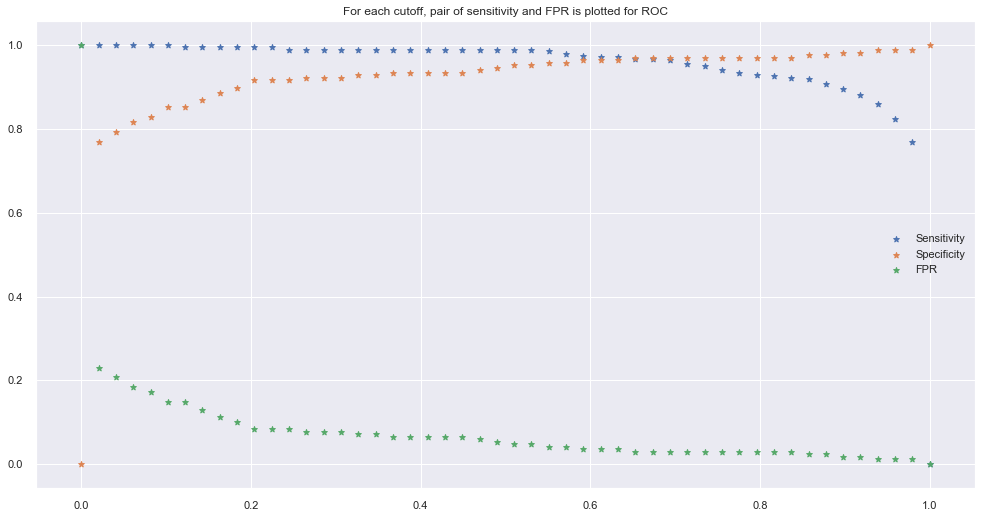

In [221]:
plt.subplots(figsize=(15,8))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [222]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.55102,0.986014,0.95858,1.944594


####  Model Validation
    - Coefficient Stability - sign and p-values

In [225]:
train_gini = 2*metrics.roc_auc_score(train_X['Cancer'], logistic_fit.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['Cancer'], logistic_fit.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.984689866347
The Gini Index for the model built on the Test Data is :  0.987553226335


#### Model Validation
    - Cut-Off based sensitivity comparison

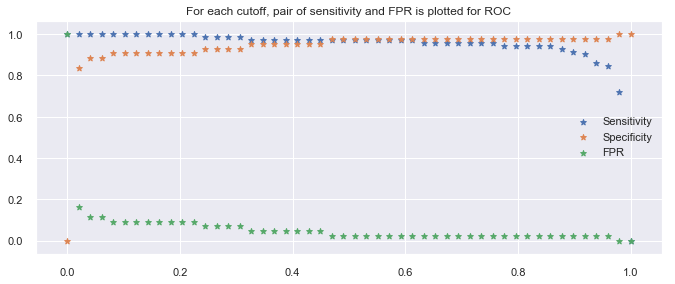

In [228]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(logistic_fit.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['Cancer']
# making a DataFrame with actual and prob columns
hr_test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
hr_test_predict.columns = ['actual','prob']
hr_test_predict.head()

## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
test_roc_like_df = pd.DataFrame()
test_temp = hr_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)

test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [229]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.469388,0.971831,0.976744,1.948575
0,0.489796,0.971831,0.976744,1.948575
0,0.510204,0.971831,0.976744,1.948575
0,0.530612,0.971831,0.976744,1.948575
0,0.551020,0.971831,0.976744,1.948575
0,0.571429,0.971831,0.976744,1.948575
0,0.591837,0.971831,0.976744,1.948575
0,0.612245,0.971831,0.976744,1.948575


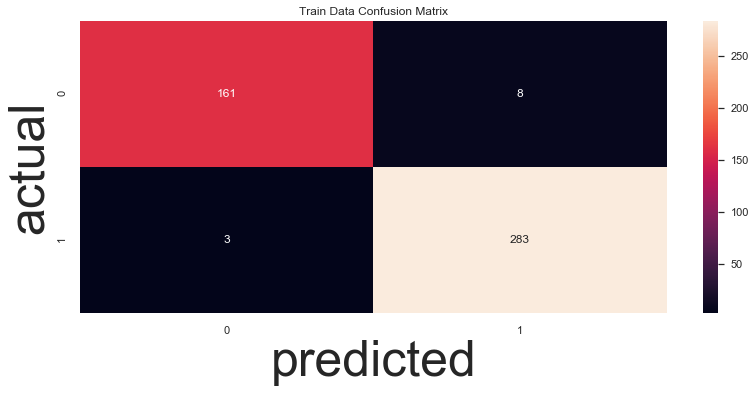

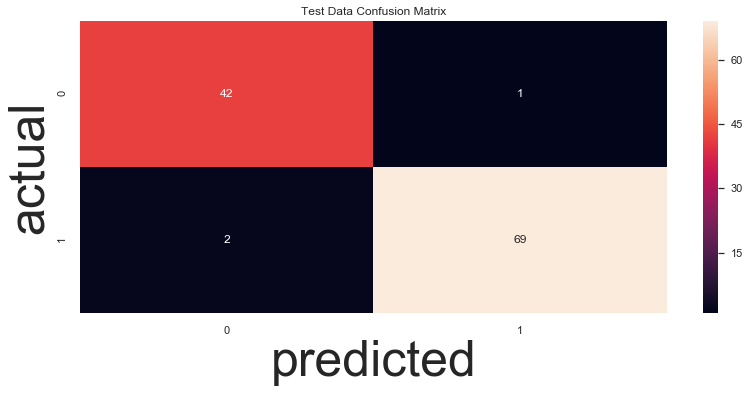

In [235]:
hr_test_predict['predicted'] = hr_test_predict['prob'].apply(lambda x: 1 if x > 0.541 else 0)
hr_train_predict['predicted'] = hr_train_predict['prob'].apply(lambda x: 1 if x > 0.541 else 0)
sns.heatmap(pd.crosstab(hr_train_predict['actual'], hr_train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(hr_test_predict['actual'], hr_test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()
# (2683+937)/(2683+745+135+937)

In [236]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(hr_train_predict.actual, hr_train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(hr_test_predict.actual, hr_test_predict.predicted))

The overall accuracy score for the Train Data is :  0.975824175824
The overall accuracy score for the Test Data  is :  0.973684210526
